In [39]:
%reload_ext autoreload

import reservoirpy as rpy
rpy.verbosity(0)
rpy.set_seed(42)

from custom_reservoir import CustomReservoir
from models.lif_neuron import LIFNeuron
import numpy as np

units = 32

# LIFニューロンモデルを作成
lif_model = LIFNeuron(units=units)

# カスタムリザバーを作成
reservoir = CustomReservoir(
    units=units,  # ニューロン数
    neuron_model=lif_model,  # LIFニューロンモデル
    rc_connectivity = 0.3,
    input_connectivity = 0.3,  
    fb_connectivity = 0 # fb接続なし 
)

# オンオフ的な入力データ（ここではランダムなバイナリ信号）
total_steps = 500  

# オンオフパターン作成 (100msオン, 200msオフ, 200msオン)
X = np.zeros((total_steps, 1))
X[:100] = 0.1  # 100msオン、0.1nA
X[300:500] = 0.3  # 200msオン、0.3nA

# スパイクと膜電位の記録
spike = np.empty((len(X), reservoir.output_dim))
membrane_potentials = np.empty((len(X), reservoir.units))
for i in range(len(X)):
    spike[i] = reservoir(X[i].reshape(1, -1))
    membrane_potentials[i] = reservoir.neuron_model.membrane_potentials.flatten()

ModuleNotFoundError: No module named 'custom_reservoir'

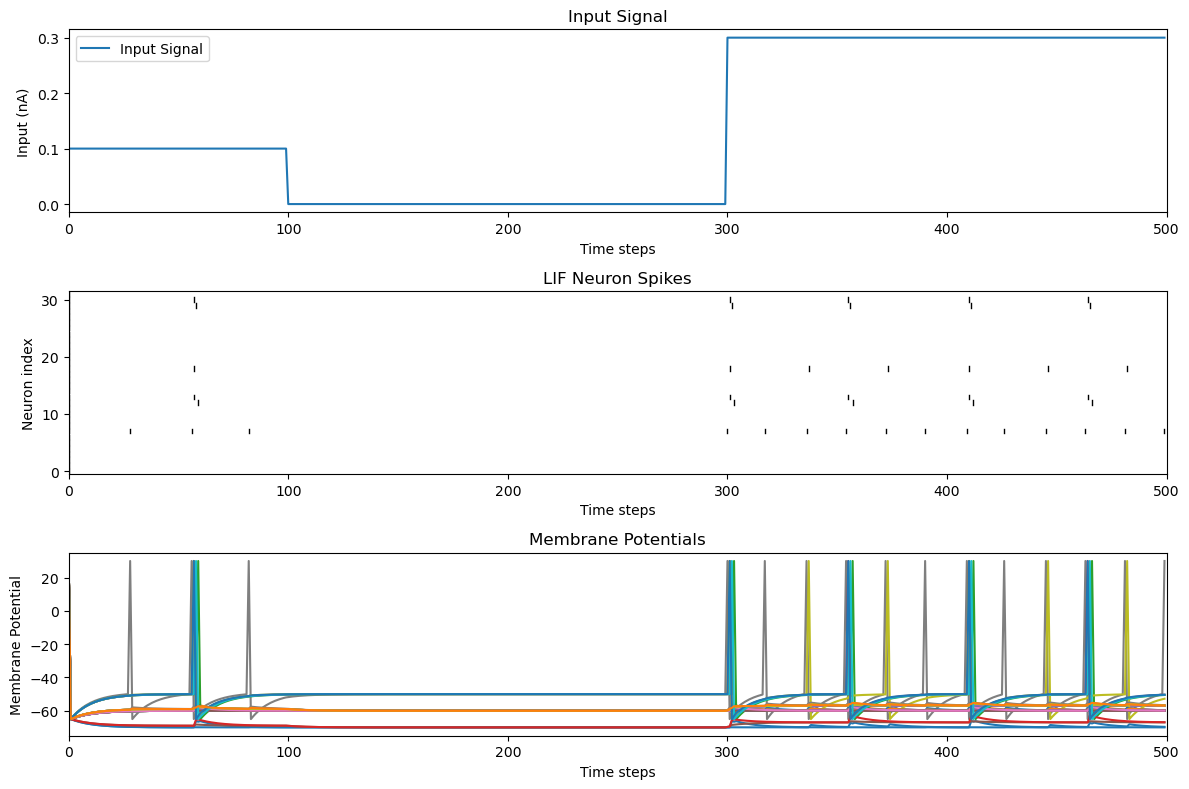

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 入力データのプロット
plt.subplot(3, 1, 1)
plt.plot(X, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time steps")
plt.xlim(0, len(X))
plt.ylabel("Input (nA)")
plt.legend()


# スパイクデータのプロット
plt.subplot(3, 1, 2)
plt.title("LIF Neuron Spikes")
for neuron_idx in range(spike.shape[1]):
    for t, spike_value in enumerate(spike[:, neuron_idx]):
        if spike_value > 0:
            plt.plot([t, t], [neuron_idx - 0.4, neuron_idx + 0.4], color='k', linestyle='-', linewidth=1)  # 発火したタイムステップに黒い縦線を表示

plt.xlabel("Time steps")
plt.ylabel("Neuron index")
plt.xlim(0, len(X))
plt.ylim(-0.5, spike.shape[1] - 0.5)

# 膜電位のプロット
plt.subplot(3, 1, 3)
plt.title("Membrane Potentials")
for neuron_idx in range(membrane_potentials.shape[1]):
    plt.plot(membrane_potentials[:, neuron_idx], label=f"Neuron {neuron_idx}")

plt.xlabel("Time steps")
plt.xlim(0, len(X))
plt.ylabel("Membrane Potential")
# plt.legend(loc='upper right')

plt.tight_layout()
plt.show()